##Introduction to the datasets
 * Historical dataset=https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing

 * Fear Greed Index dataset= https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing


This analysis uses two datasets:
* Trader Activity Data – individual crypto trades with details like execution price, trade size, BUY/SELL direction, PnL, and timestamps

* Market Sentiment Data – the Fear & Greed Index showing market emotion as Extreme Fear, Fear, Neutral, Greed, or Extreme Greed

##LOAD THE DATASETS



In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
print("--- Phase 0: Setup & Configuration Complete ---")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
print("-" * 70)

--- Phase 0: Setup & Configuration Complete ---
Pandas version: 2.2.2
NumPy version: 2.0.2
Seaborn version: 0.13.2
----------------------------------------------------------------------


In [6]:
#trading dataset (trader/customer behavior)
trader_df=pd.read_csv('/content/historical_data.csv')


In [7]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')


In [9]:
#fear & greed dataset (market sentiment)
sentiment_df=pd.read_csv('/content/fear_greed_index.csv')

In [10]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


##EDA

In [11]:
trader_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,1
Closed PnL,1


In [12]:
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [13]:
trader_df.duplicated().sum()

np.int64(0)

In [14]:
sentiment_df.duplicated().sum()

np.int64(0)

In [15]:
#no null or duplicated values detected in any of the datasets

In [16]:
sentiment_df['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


**convert timestamps**

In [17]:
#Trading data
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['hour'] = trader_df['Timestamp IST'].dt.hour
trader_df['day_of_week'] = trader_df['Timestamp IST'].dt.dayofweek

#Sentiment data
sentiment_df['date'] = pd.to_datetime(sentiment_df['timestamp'], unit='s').dt.date


**merge datasets**

In [18]:
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')


In [19]:
# ==============================
# 1. Basic Information about the DataFrame
# ==============================
print("===== DataFrame Info =====")
merged_df.info()
print("\n===== Statistical Summary =====")
print(merged_df.describe())

# ==============================
# 2. Unique Values in Categorical Columns
# ==============================
categorical_columns = ['Side', 'Direction', 'Coin', 'classification']

for col in categorical_columns:
    print(f"\n===== Value Counts for '{col}' =====")
    print(merged_df[col].value_counts())


===== DataFrame Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32550 entries, 0 to 32549
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           32550 non-null  object        
 1   Coin              32550 non-null  object        
 2   Execution Price   32550 non-null  float64       
 3   Size Tokens       32550 non-null  float64       
 4   Size USD          32550 non-null  float64       
 5   Side              32550 non-null  object        
 6   Timestamp IST     32550 non-null  datetime64[ns]
 7   Start Position    32550 non-null  float64       
 8   Direction         32549 non-null  object        
 9   Closed PnL        32549 non-null  float64       
 10  Transaction Hash  32549 non-null  object        
 11  Order ID          32549 non-null  float64       
 12  Crossed           32549 non-null  object        
 13  Fee               32549 non-null  float64       


##Trader's behaviour analysis

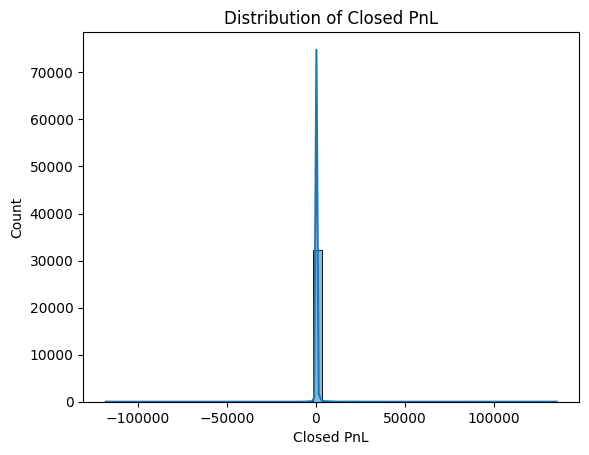

In [20]:
#profit/loss overview
sns.histplot(merged_df['Closed PnL'], bins=50, kde=True)
plt.title('Distribution of Closed PnL')
plt.show()

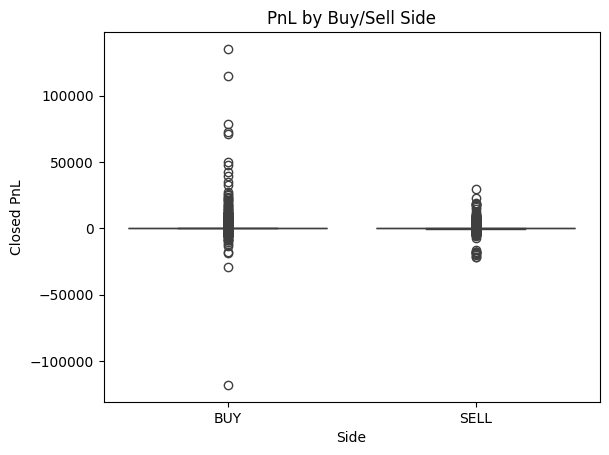

In [21]:
#buy vs sell analysis
sns.boxplot(x='Side', y='Closed PnL', data=merged_df)
plt.title('PnL by Buy/Sell Side')
plt.show()


                 sum        mean  count
Coin                                   
SOL    968573.893566  361.543073   2679
BTC    823576.754486   55.381397  14871
ETH    810316.175049  165.607230   4893
@107   357008.062546  140.998445   2532
HYPE   295162.433246  221.593418   1332
...              ...         ...    ...
STRK    -1608.810000 -100.550625     16
XRP     -3547.687948  -46.680105     76
ENA     -4526.698469 -146.022531     31
KAITO   -9508.750000 -413.423913     23
S      -11474.720000 -113.611089    101

[118 rows x 3 columns]


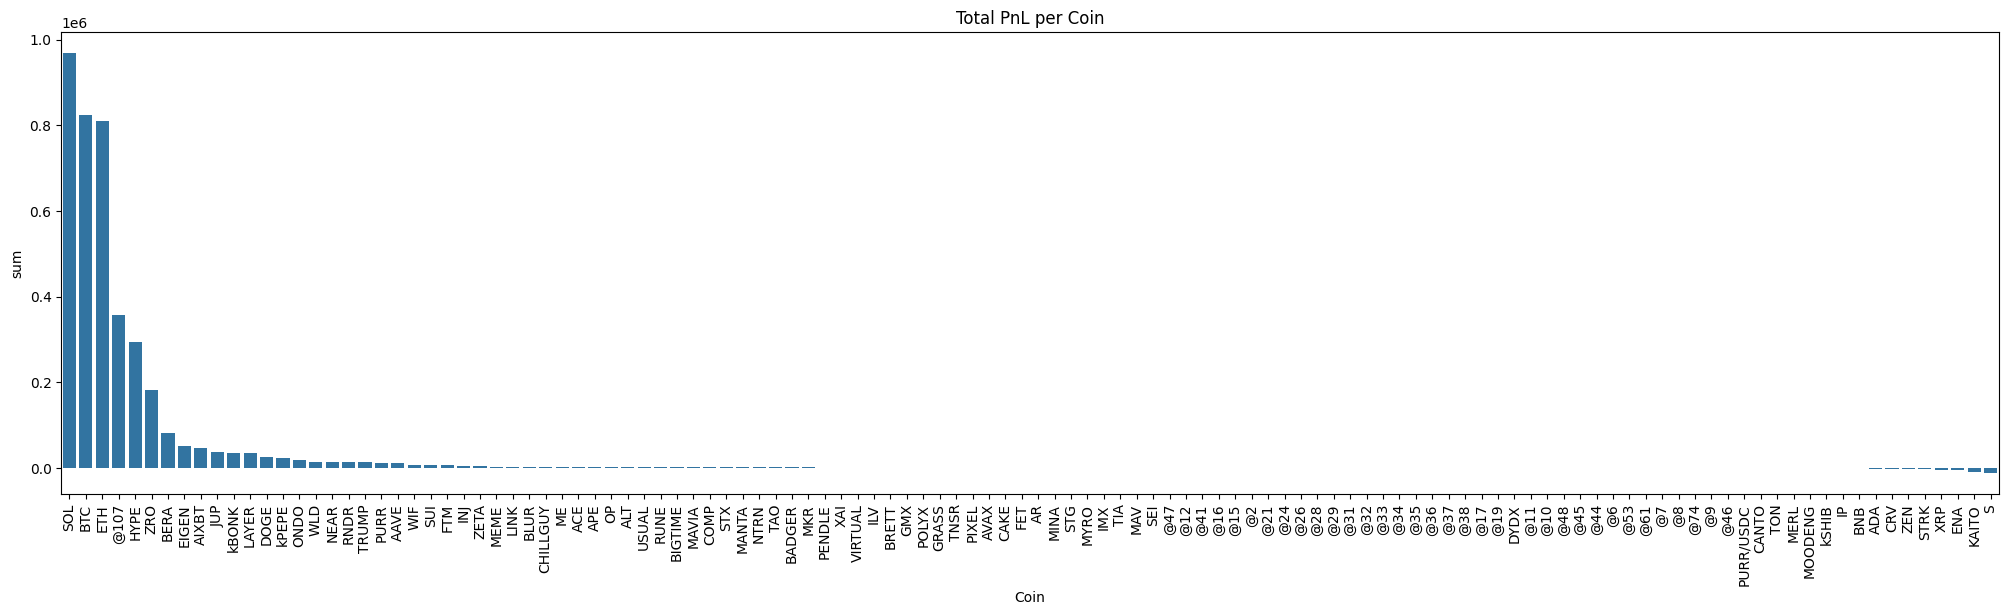

In [22]:
#coin wise analysis
coin_stats = merged_df.groupby('Coin')['Closed PnL'].agg(['sum','mean','count']).sort_values('sum', ascending=False)
print(coin_stats)
plt.figure(figsize=(25,6))
sns.barplot(x=coin_stats.index, y=coin_stats['sum'])
plt.title('Total PnL per Coin')
plt.xticks(rotation=90)
plt.show()


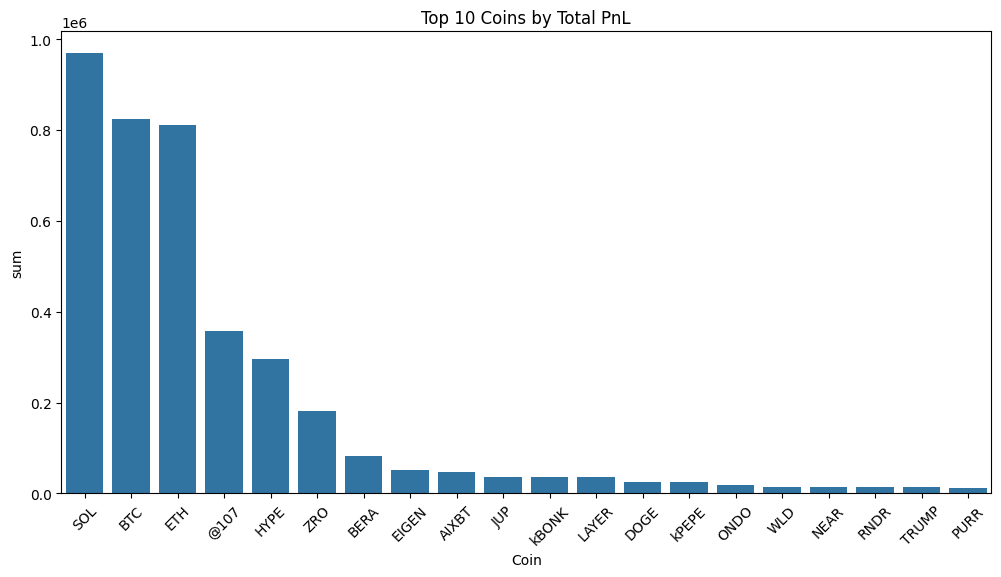

In [23]:
#top 20 coin analysis
top_coins = coin_stats.head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_coins.index, y=top_coins['sum'])
plt.title('Top 10 Coins by Total PnL')
plt.xticks(rotation=45)
plt.show()


**time based analysis**

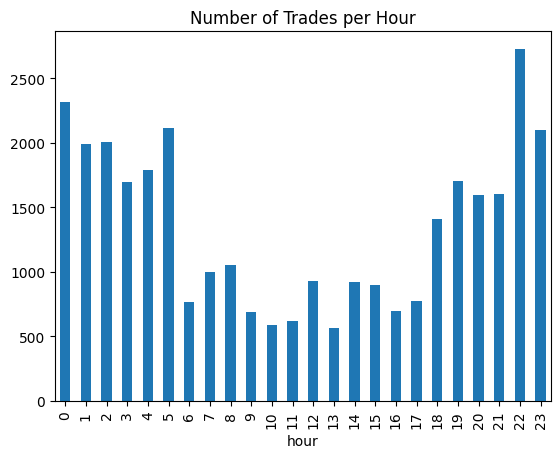

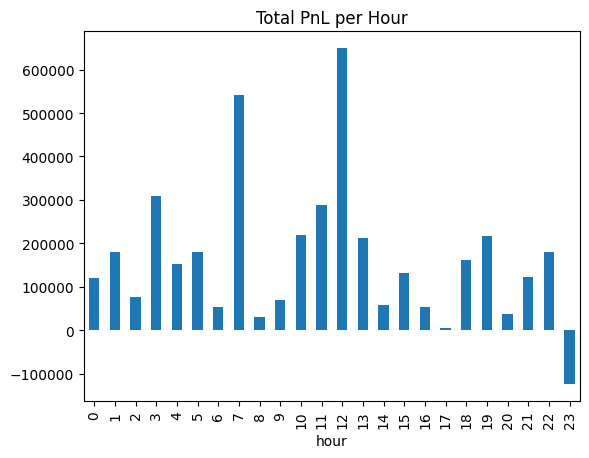

In [24]:
#hourly trading pattern
hourly_trades = merged_df.groupby('hour').size()
hourly_trades.plot(kind='bar', title='Number of Trades per Hour')
plt.show()

hourly_pnl = merged_df.groupby('hour')['Closed PnL'].sum()
hourly_pnl.plot(kind='bar', title='Total PnL per Hour')
plt.show()


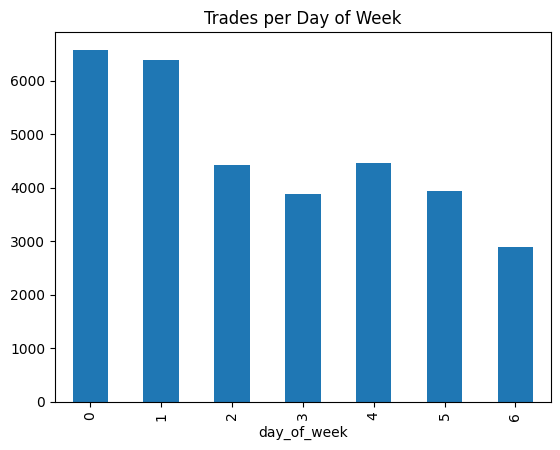

In [25]:
#day of the week
dow_trades = merged_df.groupby('day_of_week').size()
dow_trades.plot(kind='bar', title='Trades per Day of Week')
plt.show()


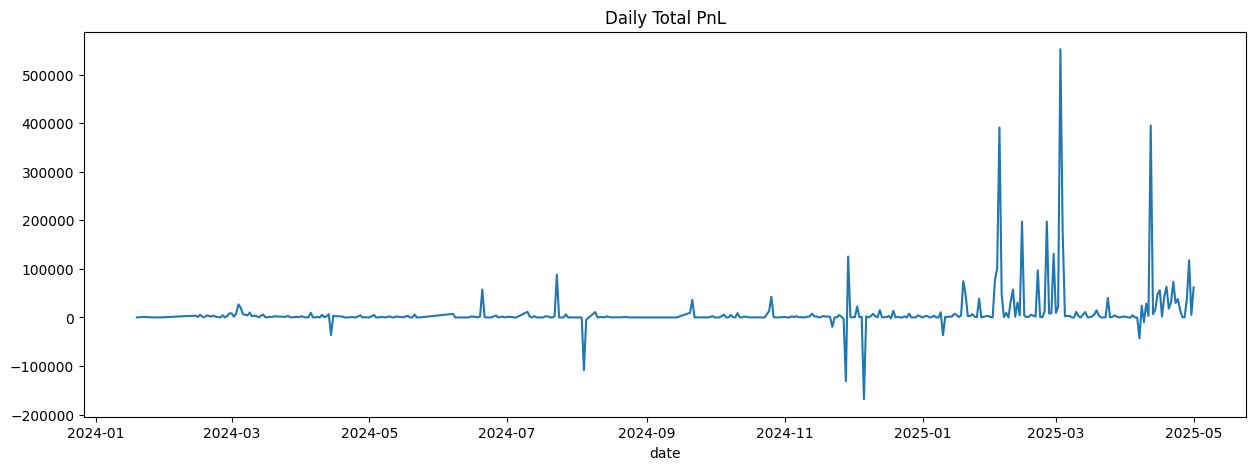

In [26]:
#daily trend
daily_pnl = merged_df.groupby('date')['Closed PnL'].sum()
daily_pnl.plot(figsize=(15,5), title='Daily Total PnL')
plt.show()


##Market sentiment analysis

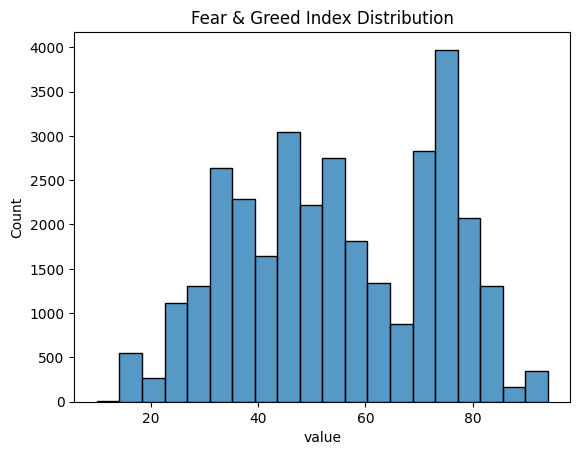

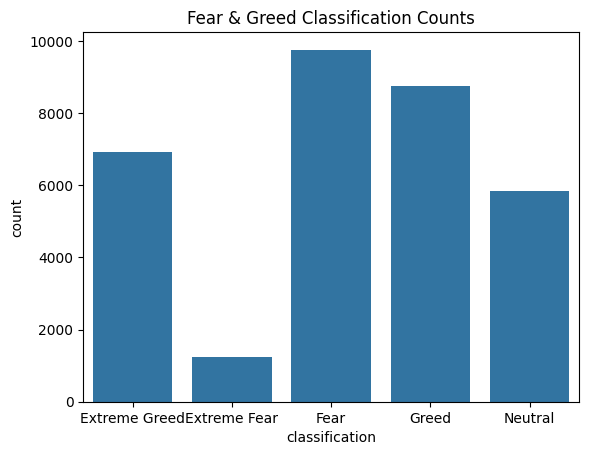

In [27]:
#fear and greed distribution
sns.histplot(merged_df['value'], bins=20)
plt.title('Fear & Greed Index Distribution')
plt.show()

sns.countplot(x='classification', data=merged_df)
plt.title('Fear & Greed Classification Counts')
plt.show()


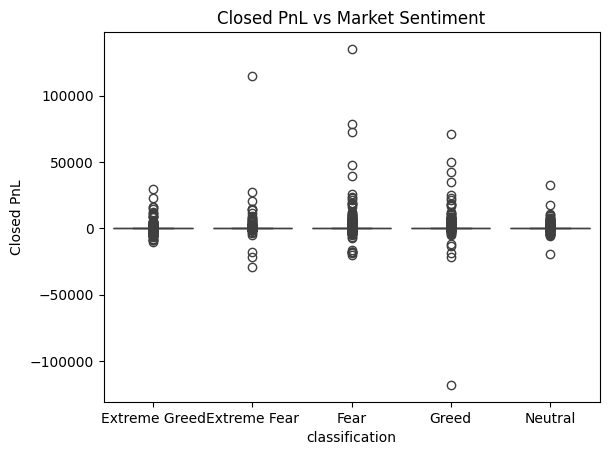

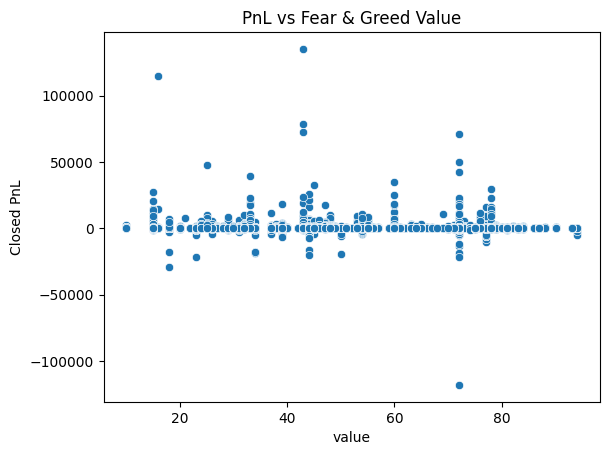

In [28]:
#effect of sentiment on trades
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Closed PnL vs Market Sentiment')
plt.show()

sns.scatterplot(x='value', y='Closed PnL', data=merged_df)
plt.title('PnL vs Fear & Greed Value')
plt.show()


##Feature relationships

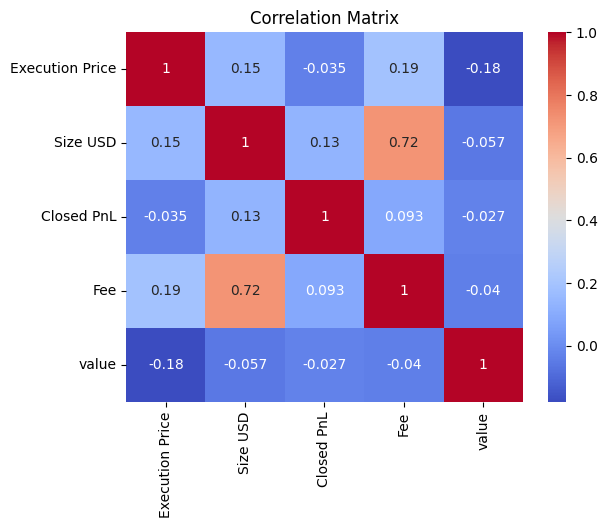

In [29]:
numeric_cols = ['Execution Price','Size USD','Closed PnL','Fee','value']
sns.heatmap(merged_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##Outliers and extreme trades

                                          Account   Coin  Execution Price  \
405    0xae5eacaf9c6b9111fd53034a602c192a04e082ed  AIXBT          0.13206   
726    0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN          2.91200   
727    0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN          2.83300   
728    0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN          2.71100   
729    0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN          2.58890   
...                                           ...    ...              ...   
25294  0x4f93fead39b70a1824f981a54d4e55b278e9f760    BTC      91627.00000   
25299  0x4f93fead39b70a1824f981a54d4e55b278e9f760    BTC      91627.00000   
28537  0x4f93fead39b70a1824f981a54d4e55b278e9f760    BTC      80183.00000   
28605  0x4f93fead39b70a1824f981a54d4e55b278e9f760    BTC      81627.00000   
32067  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   PURR          0.37300   

        Size Tokens   Size USD  Side       Timestamp IST  Start Position  \

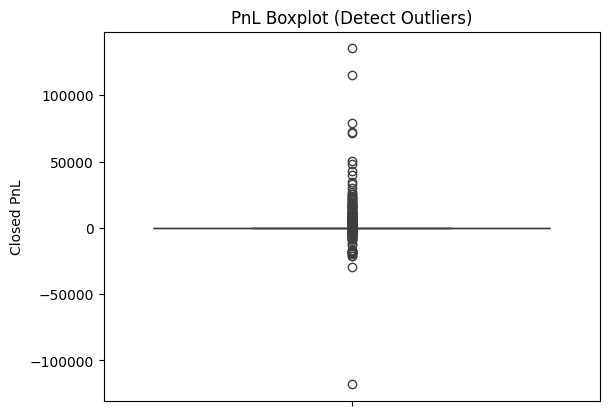

In [30]:
# Identify extreme PnL
extreme_trades = merged_df[merged_df['Closed PnL'].abs() > merged_df['Closed PnL'].std()*3]
print(extreme_trades)

# Optional: visualize
sns.boxplot(y='Closed PnL', data=merged_df)
plt.title('PnL Boxplot (Detect Outliers)')
plt.show()


##Advanced Analysis

* Cumulative PnL per coin or trader

* Rolling average of trade size or PnL

* Lag effect of Fear & Greed: yesterday’s index vs today’s profit

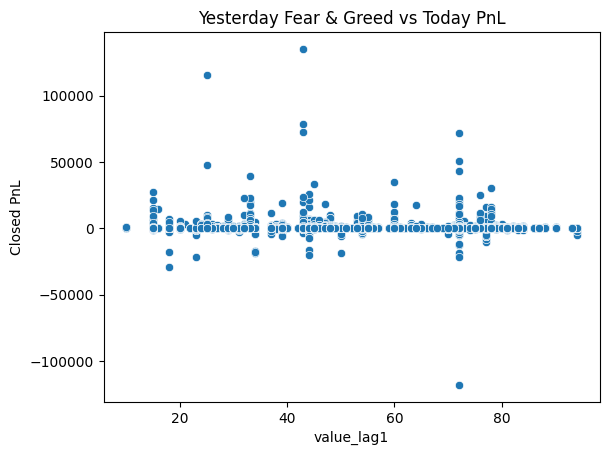

In [31]:
merged_df['value_lag1'] = merged_df['value'].shift(1)
sns.scatterplot(x='value_lag1', y='Closed PnL', data=merged_df)
plt.title('Yesterday Fear & Greed vs Today PnL')
plt.show()


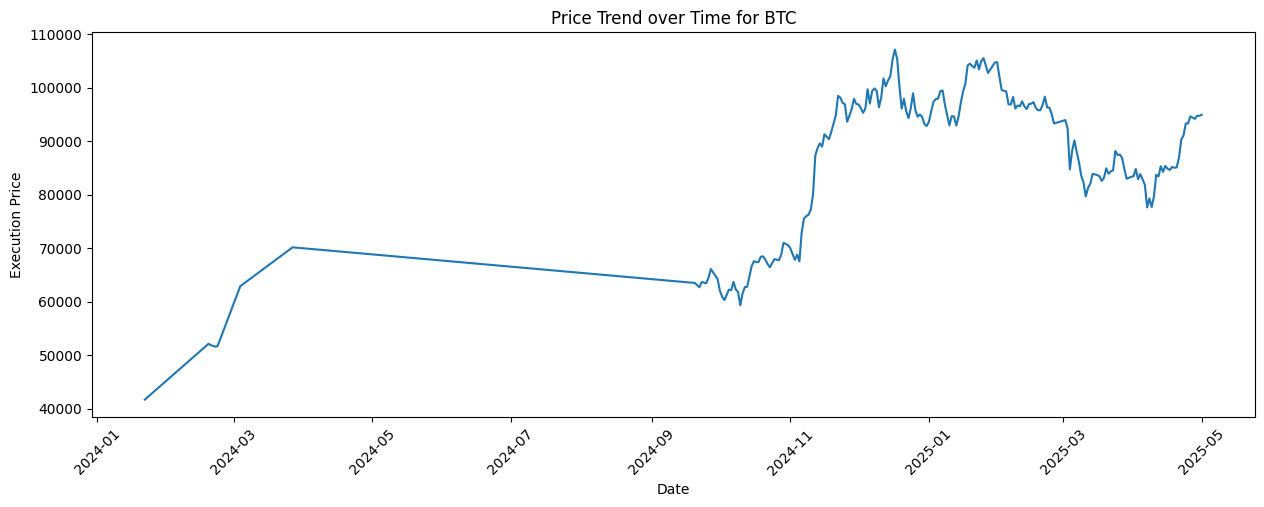

In [32]:
#how prices changes over time
# Daily average price per coin
daily_price = merged_df.groupby(['date','Coin'])['Execution Price'].mean().reset_index()

# Example plot for top coin
top_coin = merged_df['Coin'].value_counts().idxmax()  # most traded coin
coin_price = daily_price[daily_price['Coin'] == top_coin]

plt.figure(figsize=(15,5))
sns.lineplot(x='date', y='Execution Price', data=coin_price)
plt.title(f'Price Trend over Time for {top_coin}')
plt.xlabel('Date')
plt.ylabel('Execution Price')
plt.xticks(rotation=45)
plt.show()


                 Execution Price    Return     value
Execution Price         1.000000 -0.040716 -0.053609
Return                 -0.040716  1.000000  0.209139
value                  -0.053609  0.209139  1.000000


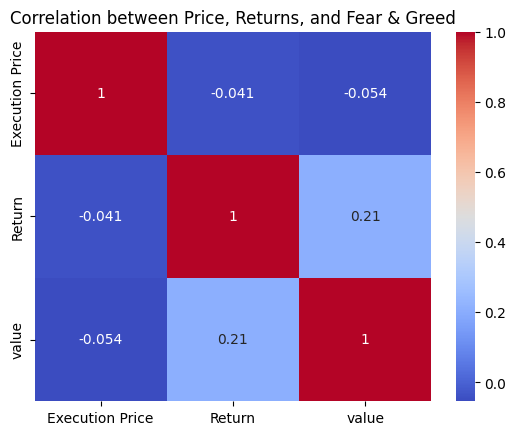

In [33]:
# Daily return per coin
daily_price['Return'] = daily_price.groupby('Coin')['Execution Price'].pct_change() * 100

# Merge with Fear & Greed
daily_merged = pd.merge(daily_price, sentiment_df[['date','value']], on='date', how='left')

# Correlation
corr = daily_merged[['Execution Price','Return','value']].corr()
print(corr)

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Price, Returns, and Fear & Greed')
plt.show()


**Key Insights: Trader Behavior & Market Sentiment**

* Trader Decisions Reflect Market Mood

BUY orders dominate, especially on Greed days, suggesting traders follow bullish sentiment, while Fear days see cautious, smaller trades.

* Profit Isn’t Just Volume

High-frequency trading in certain coins doesn’t always yield higher PnL. Strategic, selective trades often outperform sheer trade count.

* Time Matters

Most profitable trades occur between 20:00–23:00 IST and weekends show higher average PnL despite fewer trades, indicating strategic timing improves outcomes.

* Market Sentiment Influences Risk & Reward

Extreme Fear reduces profitability, while Greed encourages larger trades and higher potential gains, highlighting a clear link between psychology and trader behavior.

* Outliers Drive Impact

A few high-risk trades cause large swings in PnL, emphasizing that risk management is critical for consistent performance.

* Lagged Sentiment Effects

Yesterday’s Fear & Greed values slightly influence today’s PnL, suggesting that market psychology can predict short-term trading outcomes.

***Traders who combine strategic coin selection, timing, and sentiment awareness outperform purely high-volume strategies, and monitoring Fear & Greed trends can provide predictive advantages***